In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor)
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

## Downloading Dataset:

In [314]:
# https://www.transportation.gov
# https://www.kaggle.com/abdurrehmankhalid/delayedflights
data = pd.read_csv('data/DelayedFlights.csv')

In [211]:
data.shape

(1936758, 30)

## Cleaning the Dataset:

In [212]:
# Only interested in Boston Logan Airport destination:
boston_df = data[data.Dest == 'BOS']
boston_df.ArrDelay.min()

-41.0

In [213]:
boston_df.shape

(31961, 30)

In [214]:
boston_df.isnull().sum()

Unnamed: 0              0
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                63
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime      83
CRSElapsedTime          0
AirTime                83
ArrDelay               83
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                 63
TaxiOut                11
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay         9951
WeatherDelay         9951
NASDelay             9951
SecurityDelay        9951
LateAircraftDelay    9951
dtype: int64

In [215]:
relative_columns = ['Month','DayOfWeek', 'UniqueCarrier', 'DepTime', 'Origin', 'ArrDelay']

In [216]:
boston_df = boston_df[relative_columns]

In [217]:
boston_df.isnull().sum()

Month             0
DayOfWeek         0
UniqueCarrier     0
DepTime           0
Origin            0
ArrDelay         83
dtype: int64

In [218]:
boston_df.ArrDelay.min()

-41.0

In [219]:
boston_df.dropna(inplace = True)

In [220]:
boston_df.ArrDelay.min()

-41.0

In [221]:
boston_df.isnull().sum()

Month            0
DayOfWeek        0
UniqueCarrier    0
DepTime          0
Origin           0
ArrDelay         0
dtype: int64

In [222]:
boston_df.shape

(31878, 6)

In [223]:
boston_df.head()

,Month,DayOfWeek,UniqueCarrier,DepTime,Origin,ArrDelay
33785,1,7,XE,2024.0,CLE,109.0
34590,1,6,XE,2120.0,EWR,8.0
34875,1,1,XE,817.0,CLE,109.0
35047,1,4,XE,1930.0,CLE,29.0
36021,1,2,XE,1938.0,CLE,44.0


In [224]:
boston_df.columns

Index(['Month', 'DayOfWeek', 'UniqueCarrier', 'DepTime', 'Origin', 'ArrDelay'], dtype='object')

# Changing departures time format:

In [225]:
# Since only interested in hour of the day, changing time format to hour only:
boston_df['DepHour'] = boston_df['DepTime'].apply(lambda x: int(x/100))

In [226]:
# changing ArrDelay type from float to int:
boston_df['MinDelay'] = boston_df['ArrDelay'].apply(lambda x: int(x))

In [227]:
boston_df.head()

,Month,DayOfWeek,UniqueCarrier,DepTime,Origin,ArrDelay,DepHour,MinDelay
33785,1,7,XE,2024.0,CLE,109.0,20,109
34590,1,6,XE,2120.0,EWR,8.0,21,8
34875,1,1,XE,817.0,CLE,109.0,8,109
35047,1,4,XE,1930.0,CLE,29.0,19,29
36021,1,2,XE,1938.0,CLE,44.0,19,44


In [228]:
# Dropping unnecessary columns: 
boston_df.drop(columns = ['ArrDelay', 'DepTime'], axis = 1, inplace = True)

In [229]:
# Resetting index and dropping the old one: 
boston_df.reset_index(drop = True, inplace = True)

In [230]:
# Clean data:
boston_df.head()

,Month,DayOfWeek,UniqueCarrier,Origin,DepHour,MinDelay
0,1,7,XE,CLE,20,109
1,1,6,XE,EWR,21,8
2,1,1,XE,CLE,8,109
3,1,4,XE,CLE,19,29
4,1,2,XE,CLE,19,44


In [231]:
boston_df.columns

Index(['Month', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'DepHour', 'MinDelay'], dtype='object')

# Visualization:

In [232]:
# The flight is considered to be delayed when departure time was 30 minutes later than scheduled time:
# Avg_dep_del data frame represents 6 highest average delayed time by airline 
Avg_dep_del = boston_df[boston_df.MinDelay > 30].groupby('UniqueCarrier').mean().nlargest(6, 'MinDelay')['MinDelay']

In [233]:
Avg_dep_del

UniqueCarrier
AS    121.690476
YV    113.834437
B6     98.491259
XE     92.738095
OH     90.044085
UA     89.526148
Name: MinDelay, dtype: float64

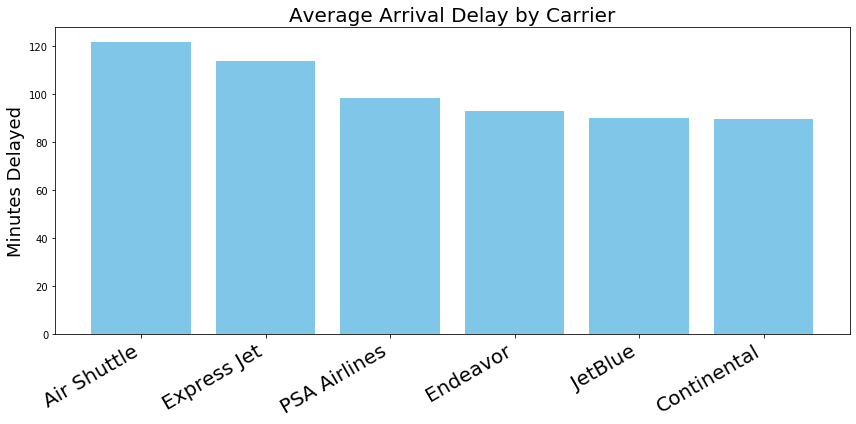

In [234]:
# Plotting:
plt.figure(figsize = (12,6))
plt.style.use('tableau-colorblind10')
x = ['Air Shuttle','Express Jet','PSA Airlines','Endeavor','JetBlue','Continental']
x_indexes = np.arange(len(x))
y = Avg_dep_del
plt.bar(x_indexes, y, color="#008fd5", alpha = 0.5)
plt.xticks(ticks = x_indexes, labels = x,size = 20)
plt.title("Average Arrival Delay by Carrier", size = 20)
plt.ylabel("Minutes Delayed", size = 18)
plt.gcf().autofmt_xdate()
#plt.xticks(['Air Shuttle','Express Jet','PSA Airlines','Endeavor','JetBlue','Continental'], size = 18)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/Avg_dep_del.png')
plt.show()

In [235]:
# Adding a column to boston_df where 1 represents when the flight was delayed and 0 when it was not:
boston_df['Delayed'] = boston_df['MinDelay'].apply(lambda x: x > 30).replace((True, False), (1, 0))

In [236]:
# The total number of delayed flights by day of the week:
weekday_delayed = boston_df.groupby('DayOfWeek').sum()['Delayed']

In [237]:
# The total number of flights by day of the week:
weekday_total = boston_df.groupby('DayOfWeek').count()['Delayed']

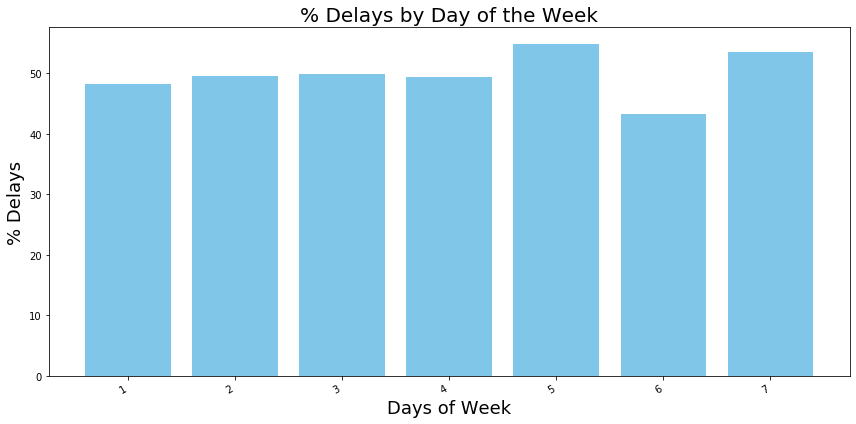

In [238]:
plt.figure(figsize = (12,6))
plt.style.use('tableau-colorblind10')
x = weekday_delayed.index
x_indexes = list(weekday_total.index)
y = (weekday_delayed/weekday_total) * 100
plt.bar(x_indexes, y, color="#008fd5", alpha = 0.5)
plt.title("% Delays by Day of the Week", size = 20)
plt.ylabel("% Delays", size = 18)
plt.xlabel("Days of Week", size = 18)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(False)
plt.savefig('img/week day % dalays.png')
plt.show()

In [239]:
# The total number of delayed flights by month:
monthly_delayed = boston_df.groupby('Month').sum()['Delayed']

In [240]:
# The total number of flights by month:
monthly_total = boston_df.groupby('Month').count()['Delayed']

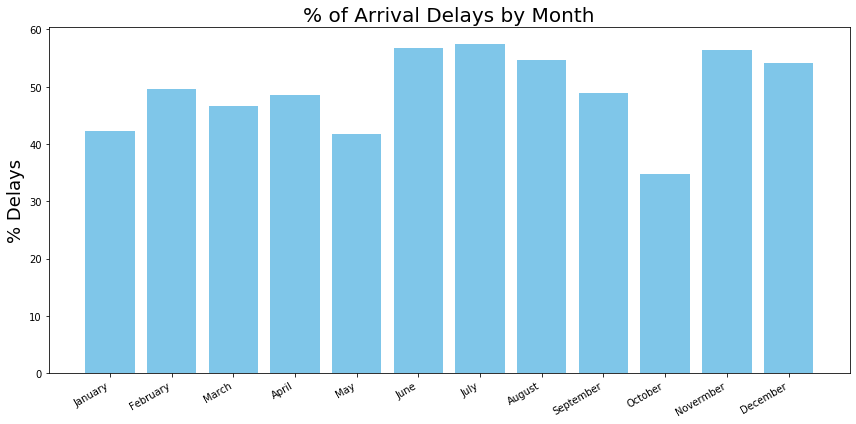

In [241]:
plt.figure(figsize = (12,6))
plt.style.use('tableau-colorblind10')
x = ['January','February','March','April','May','June', 'July','August', 'September','October','Novermber','December']
y = (monthly_delayed/monthly_total) * 100
plt.bar(x, y, color="#008fd5", alpha = 0.5)
plt.title("% of Arrival Delays by Month", size = 20)
plt.ylabel("% Delays", size = 18)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(False)
plt.savefig('img/month % delays.png')
plt.show()

In [242]:
# The total number of delayed flights by hour:
hourly_delayed = boston_df.groupby('DepHour').sum()['Delayed']

In [243]:
# The total number of flights by hour:
hourly_total = boston_df.groupby('DepHour').count()['Delayed']

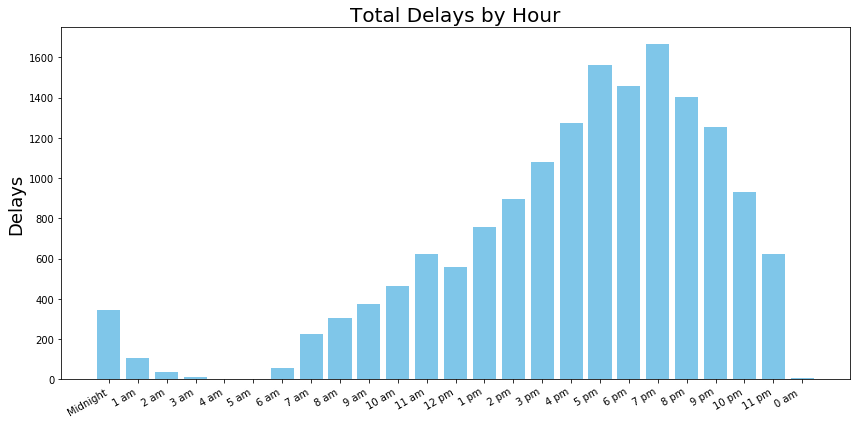

In [244]:
plt.figure(figsize = (12,6))
plt.style.use('tableau-colorblind10')
x = ['Midnight','1 am','2 am','3 am','4 am','5 am', '6 am','7 am', '8 am','9 am','10 am','11 am', '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm', '0 am ']
y = hourly_delayed
plt.bar(x, y, color="#008fd5", alpha = 0.5)
plt.title("Total Delays by Hour", size = 20)
plt.ylabel("Delays", size = 18)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(False)
plt.savefig('img/hour delays.png')
plt.show()

In [245]:
# Total number of delays by carrier:
delay_carrier = boston_df.groupby('UniqueCarrier').sum().nlargest(6, 'Delayed')['Delayed']

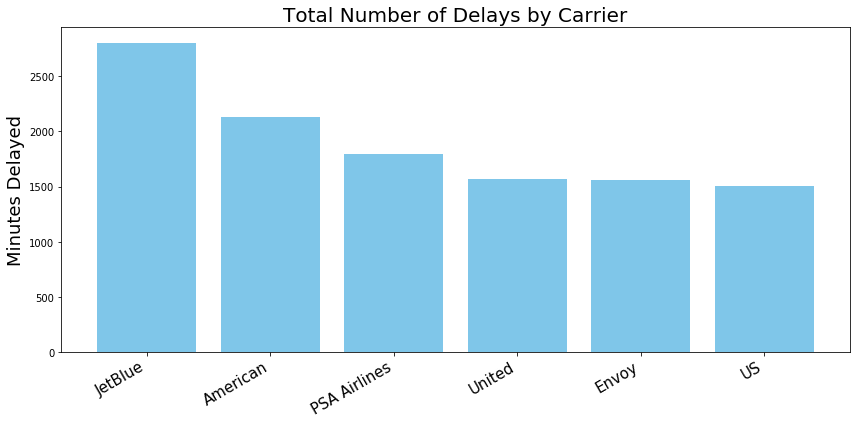

In [246]:
plt.figure(figsize = (12,6))
plt.style.use('tableau-colorblind10')
x = ['JetBlue','American','PSA Airlines','United','Envoy','US']
x_indexes = np.arange(len(x))
y = delay_carrier
plt.bar(x_indexes, y, color="#008fd5", alpha = 0.5)
plt.xticks(ticks = x_indexes, labels = x,size = 15)
plt.title("Total Number of Delays by Carrier", size = 20)
plt.ylabel("Minutes Delayed", size = 18)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(False)
plt.savefig('img/delays by carrier.png')
plt.show()

# Predicting Delays:

## Getting Dummie Values for Origin and Carrier Columns:

In [247]:
boston_df.dtypes

Month             int64
DayOfWeek         int64
UniqueCarrier    object
Origin           object
DepHour           int64
MinDelay          int64
Delayed           int64
dtype: object

In [248]:
boston_df_dumm = pd.get_dummies(boston_df, columns = ['Origin', 'UniqueCarrier'])

In [249]:
boston_df_dumm.head()

,Month,DayOfWeek,DepHour,MinDelay,Delayed,Origin_ALB,Origin_ATL,Origin_AUS,Origin_BGR,Origin_BNA,...,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_FL,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_XE,UniqueCarrier_YV
0,1,7,20,109,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,6,21,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,8,109,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,4,19,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2,19,44,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [250]:
boston_df.head()

,Month,DayOfWeek,UniqueCarrier,Origin,DepHour,MinDelay,Delayed
0,1,7,XE,CLE,20,109,1
1,1,6,XE,EWR,21,8,0
2,1,1,XE,CLE,8,109,1
3,1,4,XE,CLE,19,29,0
4,1,2,XE,CLE,19,44,1


## Splitting the Dataset:

In [251]:
X = boston_df.drop(['MinDelay', 'Delayed'], axis = 1)
y = boston_df['MinDelay']
Xd = boston_df_dumm.drop(['MinDelay', 'Delayed'], axis = 1)
y_bin = boston_df['Delayed']

In [252]:
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_bin, y_test_bin = train_test_split(Xd, y_bin, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the Dataset:

In [253]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_trans = scaler.fit(X_train_d).transform(X_train_d)
X_test_trans = scaler.transform(X_test_d)

## Calculating P Values and CI's:

In [254]:
boston_df.describe()

,Month,DayOfWeek,DepHour,MinDelay,Delayed
count,31878.000000,31878.000000,31878.000000,31878.00000,31878.000000
mean,6.213752,3.977633,15.561955,48.90426,0.502165
std,3.346439,1.995879,4.744087,59.11616,0.500003
min,1.000000,1.000000,0.000000,-41.00000,0.000000
25%,3.000000,2.000000,12.000000,10.00000,0.000000
50%,6.000000,4.000000,16.000000,31.00000,1.000000
75%,9.000000,6.000000,19.000000,69.00000,1.000000
max,12.000000,7.000000,24.000000,927.00000,1.000000


In [258]:
boston_df

,Month,DayOfWeek,UniqueCarrier,Origin,DepHour,MinDelay,Delayed
0,1,7,XE,CLE,20,109,1
1,1,6,XE,EWR,21,8,0
2,1,1,XE,CLE,8,109,1
3,1,4,XE,CLE,19,29,0
4,1,2,XE,CLE,19,44,1
...,...,...,...,...,...,...,...
31873,12,5,DL,MCO,19,35,1
31874,12,5,DL,TPA,11,0,0
31875,12,5,DL,TPA,19,39,1
31876,12,5,DL,SLC,16,14,0


In [316]:
y = boston_df['MinDelay'] 
mod = smf.ols(formula = 'MinDelay ~ C(Month) + C(DayOfWeek) + C(UniqueCarrier) + C(DepHour) + C(Origin) ', data = boston_df).fit()

PatsyError: Error evaluating factor: TypeError: 'list' object is not callable
    MinDelay ~ C(Month) + C(DayOfWeek) + C(UniqueCarrier) + C(DepHour) + C(Origin)
                          ^^^^^^^^^^^^

In [260]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MinDelay   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     44.56
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        17:29:46   Log-Likelihood:            -1.7284e+05
No. Observations:               31878   AIC:                         3.459e+05
Df Residuals:                   31759   BIC:                         3.469e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                162.4285     56.287      2.886      0.004      52.103     272.754
C(Month)[T.2]              3.7086      1.513      2.451      0.014       0.743       6.675
C(Month)[T.3]              3.2711      1.490      2.196      0.028       0.351       6.191
C(Month)[T.4]              7.1455      1.542      4.635      0.000       4.124      10.167
C(Month)[T.5]              0.7857      1.562      0.503      0.615      -2.276       3.848
C(Month)[T.6]             14.7939      1.452     10.190      0.000      11.948      17.640
C(Month)[T.7]             18.7248      1.473     12.708      0.000      15.837      21.613
C(Month)[T.8]             17.3273      1.495     11.589      0.000      14.397      20.258
C(Month)[T.9]              3.9729      1.749      2.271      0.023       0.544       7.402
C(Month)[T.10]            -4.9340      1.791     -2.755      0.006      -8.445      -1.423
C(Month)[T.11]            12.7242      1.681      7.567      0.000       9.429      16.020
C(Month)[T.12]            15.7050      1.518     10.347      0.000      12.730      18.680
C(DayOfWeek)[T.2]         -0.0083      1.154     -0.007      0.994      -2.270       2.253
C(DayOfWeek)[T.3]          2.3474      1.151      2.040      0.041       0.092       4.603
C(DayOfWeek)[T.4]          2.0717      1.136      1.823      0.068      -0.156       4.299
C(DayOfWeek)[T.5]          5.9128      1.104      5.354      0.000       3.748       8.077
C(DayOfWeek)[T.6]         -0.1952      1.247     -0.157      0.876      -2.639       2.249
C(DayOfWeek)[T.7]          6.1920      1.131      5.473      0.000       3.975       8.410
C(UniqueCarrier)[T.AA]   -29.3609     12.283     -2.390      0.017     -53.436      -5.286
C(UniqueCarrier)[T.AS]     7.7478     14.651      0.529      0.597     -20.969      36.464
C(UniqueCarrier)[T.B6]   -34.3518     12.066     -2.847      0.004     -58.002     -10.701
C(UniqueCarrier)[T.CO]   -31.8298     33.752     -0.943      0.346     -97.985      34.326
C(UniqueCarrier)[T.DL]   -36.8105     12.032     -3.059      0.002     -60.394     -13.227
C(UniqueCarrier)[T.EV]   -40.5943     21.086     -1.925      0.054     -81.923       0.734
C(UniqueCarrier)[T.FL]   -35.3324     12.118     -2.916      0.004     -59.084     -11.581
C(UniqueCarrier)[T.MQ]   -30.5852     12.085     -2.531      0.011     -54.273      -6.898
C(UniqueCarrier)[T.NW]   -14.5820     39.362     -0.370      0.711     -91.733      62.569
C(UniqueCarrier)[T.OH]   -24.2773     12.008     -2.022      0.043     -47.814      -0.741
C(UniqueCarrier)[T.UA]   -28.8505     12.245     -2.356      0.018     -52.852      -4.849
C(UniqueCarrier)[T.US]   -43.5882     12.105     -3.601      0.000     -67.315     -19.861
C(UniqueCarrier)[T.XE]   -26.9740     33.930     -0.795      0.427     -93.479  

# Logistic Regression:

## Training Logistic Regression Model:

In [261]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
lr_model = LogisticRegression()

In [262]:
lr_model.fit(X_train_trans, y_train_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Testing Logistic Regression Model:

In [263]:
y_predict = lr_model.predict(X_test_trans)

In [264]:
score = cross_val_score(lr_model, X_train_trans, y_train_bin, cv=5).mean()
print(score)

0.588620185968918


## Tunning Linear Regression Model:

In [265]:
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [266]:
# Parameters tuned:
# I could change cv from 5 to 10 in GridSearchCV
l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
C = [0.001,0.01,0.1,1,10,100]
param_grid = dict(l1_ratio=l1_ratio, C=C)

In [267]:
# Comented 
# lr = LogisticRegression(solver = 'saga',n_jobs = -1, penalty = 'elasticnet' )
# grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1)
# # Timing
# start_time = time.time()
# grid_result = grid.fit(X_train_trans, y_train_bin)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.592385 using {'C': 0.001, 'l1_ratio': 0.1}
Execution time: 591.1762690544128 ms

Best: 0.589483 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution time: 6.69084358215332 ms

In [268]:
# New lr_model with the best parameters:
lr_model = LogisticRegression(solver = 'saga', n_jobs = -1, penalty = 'elasticnet', C = 0.001, l1_ratio = 0.1 )

In [269]:
# Training new model:
lr_model.fit(X_train_trans, y_train_bin)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
# Testing new model:
y_predict = lr_model.predict(X_test_trans)

## Confusion Matrix for Logistic Regression Model:

In [271]:
cm = metrics.confusion_matrix(y_test_bin, y_predict)
print(cm)

[[1748 1436]
 [1229 1963]]


In [272]:
# Cross Validation Score:
score = cross_val_score(lr_model, X_train_trans, y_train_bin, cv=5).mean()

## Confusion Matrix Visualization:

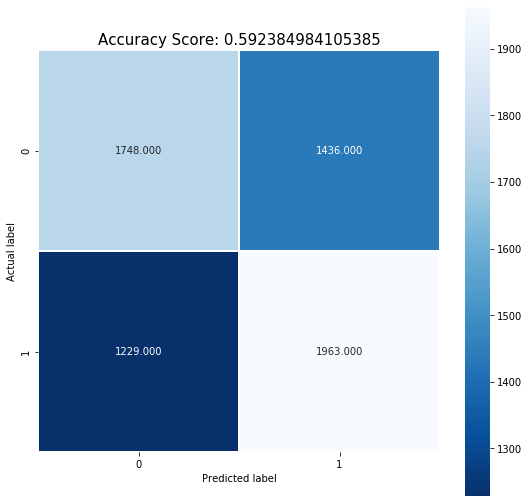

In [273]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.savefig('img/Logistic Confusion Matrix.png')

In [274]:
print(classification_report(y_test_bin, y_predict))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      3184
           1       0.58      0.61      0.60      3192

    accuracy                           0.58      6376
   macro avg       0.58      0.58      0.58      6376
weighted avg       0.58      0.58      0.58      6376



## Building ROC Curve:

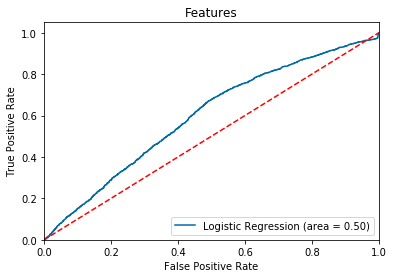

In [275]:
logit_roc_auc = roc_auc_score(y_test_bin, lr_model.predict(X_test_d))
fpr, tpr, thresholds = roc_curve(y_test_bin, lr_model.predict_proba(X_test_d)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Features')
plt.legend(loc="lower right")
plt.savefig('img/Logistic_ROC')
plt.show()

# Random Forest Classification Model:

## Changing Object Data Types to Integers:

In [276]:
X2 = boston_df.drop(['MinDelay','Delayed'], axis = 1)

In [277]:
X2.dtypes

Month             int64
DayOfWeek         int64
UniqueCarrier    object
Origin           object
DepHour           int64
dtype: object

In [278]:
le = preprocessing.LabelEncoder()
for column_name in X2.columns:
    if X2[column_name].dtype == object:
        X2[column_name] = le.fit_transform(X2[column_name])
    else:
        pass

In [279]:
X2.dtypes

Month            int64
DayOfWeek        int64
UniqueCarrier    int64
Origin           int64
DepHour          int64
dtype: object

## Splitting Dataset:

In [280]:
X2_train, X2_test, y_train_bin, y_test_bin = train_test_split(X2, y_bin, test_size=0.2, random_state=42)

## Training Random Forest Model:

In [281]:
rf_model = RandomForestClassifier(random_state = 13,n_estimators=100,max_depth=5,n_jobs = -1)
rf_model.fit(X2_train,y_train_bin)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

## Testing Random Forest Classifier:

In [282]:
y_predict = rf_model.predict(X2_test)

## Using Cross Validation Score Method to get Accuracy of Random Forest Classifier:

In [283]:
score = cross_val_score(rf_model, X2_test, y_test_bin, cv=5).mean()
print(score)

0.61182469727703


## Confusion Matrix for Random Forest Classifier Model:

In [284]:
cm = confusion_matrix(y_test_bin, y_predict)
print(cm)

[[1638 1546]
 [ 885 2307]]


## Confusion Matrix Visualization:

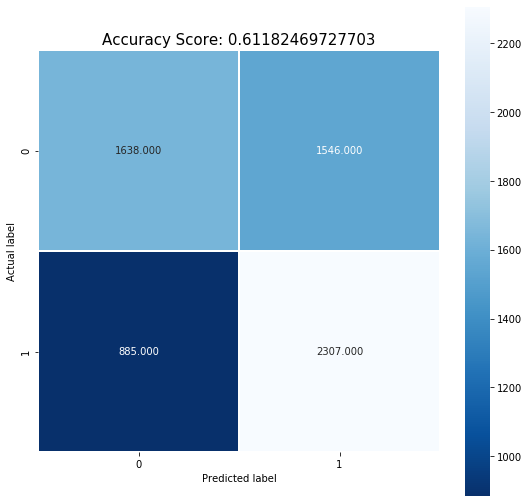

In [285]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.savefig('img/Random Forest Confusion Matrix.png')

In [286]:
print(classification_report(y_test_bin, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      3184
           1       0.60      0.72      0.65      3192

    accuracy                           0.62      6376
   macro avg       0.62      0.62      0.61      6376
weighted avg       0.62      0.62      0.61      6376



## Building ROC Curve:

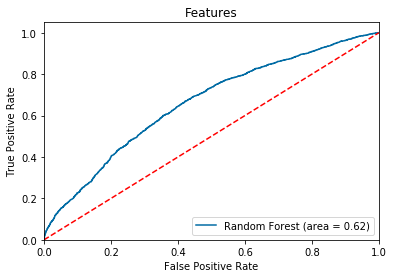

In [287]:
rf_roc_auc = roc_auc_score(y_test_bin, rf_model.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y_test_bin, rf_model.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Features')
plt.legend(loc="lower right")
plt.savefig('img/Random Forest ROC')
plt.show()

## Calculataing Gini Importance of Each Feature:

In [288]:
features = list(X2.columns)

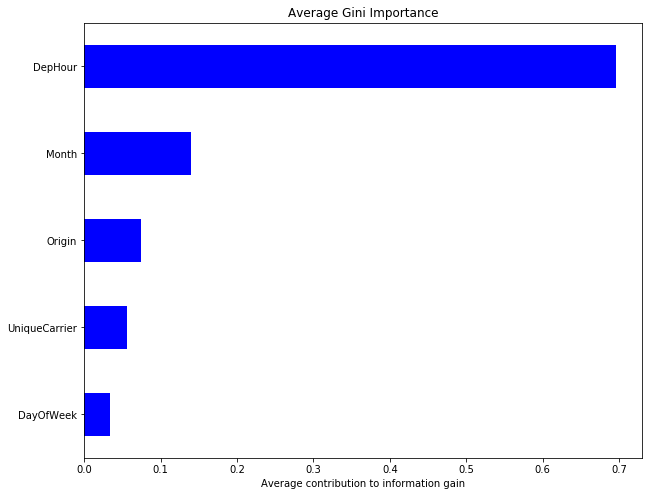

In [289]:
# Plot the feature importance
feat_scores = pd.Series(rf_model.feature_importances_,
                           index=X2.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain')
plt.savefig('img/Gini Importance')

# Gradient Boosting Classifier:

In [290]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
clf = GradientBoostingClassifier(random_state=0)

In [292]:
clf.fit(X2_train, y_train_bin)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [293]:
y_pred = clf.predict(X2_test)

In [294]:
cross_val_score(clf, X2_test, y_test_bin, cv=5).mean()

0.6223330260003689

## Tunning Gradient Boosting Classifiyer:

In [295]:
# Tuned Parameters:
n_estimators = [5,10,50]
max_depth = [3,5,10]
min_samples_split = [2,3,5]
min_samples_leaf = [30,50,70]
subsample = [0.3,0.5,0.8]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=min_samples_split,subsample=subsample,min_samples_leaf=min_samples_leaf)

In [296]:
clf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,subsample=0.8,random_state=10)

In [297]:
from sklearn.model_selection import RandomizedSearchCV

In [298]:
# clf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,subsample=0.8,random_state=10,max_features='sqrt')
# grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 5, n_jobs = -1)
# # Timing
# start_time = time.time()
# grid_result = grid.fit(X2_train, y_train_bin)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.665987 using {'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Execution time: 830.4736409187317 ms

In [303]:
# Improved Model:
clf = GradientBoostingClassifier(learning_rate=0.1,random_state=10, max_depth = 10,min_samples_leaf = 30, min_samples_split = 2, n_estimators = 50, subsample = 0.8)

In [304]:
clf.fit(X2_train, y_train_bin)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [305]:
y_pred = clf.predict(X2_test)

## Using Cross Validation Score Method to get Accuracy of Gradient Boosting Classifier:

In [306]:
score = cross_val_score(clf, X2_test, y_test_bin, cv=5).mean()
print(score)

0.6260981006822792


## Confusion Matrix for Gradient Boosting Classifier Model:

In [308]:
cm = confusion_matrix(y_test_bin, y_predict)
print(cm)

[[1638 1546]
 [ 885 2307]]


## Confusion Matrix Visualization:

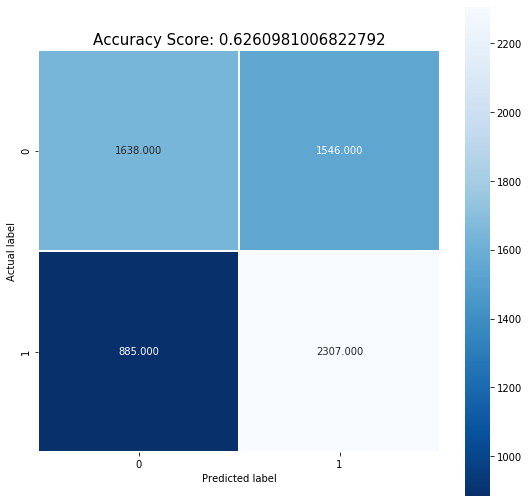

In [309]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.savefig('img/Gradient Boosting Confusion Matrix.png')

In [310]:
print(classification_report(y_test_bin, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      3184
           1       0.60      0.72      0.65      3192

    accuracy                           0.62      6376
   macro avg       0.62      0.62      0.61      6376
weighted avg       0.62      0.62      0.61      6376



## Building ROC Curve:

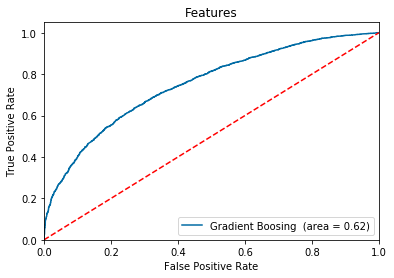

In [311]:
clf_roc_auc = roc_auc_score(y_test_bin, clf.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y_test_bin, clf.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosing  (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Features')
plt.legend(loc="lower right")
plt.savefig('img/Gradient Boosting ROC')
plt.show()

## Final Score:

In [312]:
score = clf.score(X2_test, y_test_bin)
print(score)

0.6817754077791719
